## "Neural correlates of crowding in macaque area V4"
- Author: Taekjun Kim, Anitha Pasupathy

### import modules

In [1]:
from pynwb import NWBHDF5IO;                # NWB file

import os; 
import matplotlib.pyplot as plt; 
import numpy as np;
import pandas as pd; 
import xarray as xr; 
from scipy import stats; 
from utils import er_est as er; 
from utils import func; 
from utils import PasupathyShapeGen as PSG; 

# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
from importlib import reload
reload(func)

<module 'utils.func' from '/Users/taekjunkim/Documents/UW_PasupathyLab/Experiments/3.ClutterStimuli/3.Papers/2.Manuscript/JNeurosci/data_code/utils/func.py'>

### Load nwb file

In [2]:
file_dir = './data_files/'; 
nwb_filename = file_dir + 'CrowdingExp_DB.nwb'; 
with NWBHDF5IO(nwb_filename, 'r') as io:
    nwbfile = io.read(); 
    crowd_units = nwbfile.units.to_dataframe(); 
    crowd_trials = nwbfile.trials.to_dataframe(); 
del nwbfile; 

rf_nwbfile = file_dir + 'RFmap_DB.nwb'; 
with NWBHDF5IO(rf_nwbfile, 'r') as io:
    nwbfile = io.read()
    rf_df = nwbfile.processing['process']['rf_Table'].to_dataframe()
del nwbfile; 

In [4]:
crowd_trials['stim_cond'].unique()

array(['NoStim', 'grCe', 'grSu1Ne', 'grCe_grSu1Ne', 'grSu3Ne',
       'grCe_grSu3Ne', 'grSu6Ne', 'grCe_grSu6Ne', 'grSu12Mi',
       'grCe_grSu12Mi', 'grSu18Fa', 'grCe_grSu18Fa', 'grSu12SmCiNe',
       'grCe_grSu12SmCiNe', 'grSu6CiNe', 'grCe_grSu6CiNe', 'coCe',
       'coCe_grSu6Ne', 'grCe_grSu6Ne_PS', 'grCe_grSu6CiNe_PS', 'coSu6Ne',
       'grCe_grSu12SmCiNe_PS'], dtype=object)

In [29]:
from scipy.io import savemat

In [32]:
units = dict(); 
units['unitID'] = np.arange(147); 
units['sesName'] = crowd_units['sesName'].values; 
units['sesID'] = crowd_units['sesID'].values; 
units['spike_times'] = []; 
for i in range(147):
    units['spike_times'].append(crowd_units.at[i,'spike_times']); 

savemat(file_dir+"units.mat", units)

In [36]:
trials = dict()
trials['sesName'] = crowd_trials['sesName'].values; 
trials['sesID'] = crowd_trials['sesID'].values; 
trials['stim_cond'] = crowd_trials['stim_cond'].values; 
trials['target_rot'] = crowd_trials['target_rot'].values; 
trials['rep_num'] = crowd_trials['rep_num'].values; 
trials['pd_on'] = crowd_trials['pdOn'].values; 
trials['pd_off'] = crowd_trials['pdOff'].values; 
trials['stim_pos'] = crowd_trials['stimPos'].values; 

savemat(file_dir+"trials.mat", trials)


In [33]:
crowd_trials

,start_time,stop_time,sesName,sesID,stim_cond,target_rot,rep_num,pdOn,pdOff,stimPos
id,,,,,,,,,,
0,431.988,432.888,F190723_ClutterStim_Mar2019_recut.nex,0,NoStim,NaN,0,432.288,432.585,"[18, -175]"
1,212.513,213.413,F190723_ClutterStim_Mar2019_recut.nex,0,NoStim,NaN,1,212.813,213.111,"[18, -175]"
2,1041.568,1042.468,F190723_ClutterStim_Mar2019_recut.nex,0,NoStim,NaN,2,1041.868,1042.166,"[18, -175]"
3,610.996,611.896,F190723_ClutterStim_Mar2019_recut.nex,0,NoStim,NaN,3,611.296,611.594,"[18, -175]"
4,104.502,105.402,F190723_ClutterStim_Mar2019_recut.nex,0,NoStim,NaN,4,104.802,105.099,"[18, -175]"
...,...,...,...,...,...,...,...,...,...,...
135194,1492.391,1493.291,J210714_ClutterStim_Oct2019_recut.nex,130,grCe_grSu12SmCiNe_PS,7.0,5,1492.691,1492.990,"[140, -105]"
135195,902.488,903.388,J210714_ClutterStim_Oct2019_recut.nex,130,grCe_grSu12SmCiNe_PS,7.0,6,902.788,903.088,"[140, -105]"
135196,309.628,310.528,J210714_ClutterStim_Oct2019_recut.nex,130,grCe_grSu12SmCiNe_PS,7.0,7,309.928,310.228,"[140, -105]"


In [10]:
np.shape(crowd_units.at[0,'spkMtx'])

(810, 900)

In [37]:
crowd_units

,sesName,sesID,unitID,spike_times,spkMtx
id,,,,,
0,F190723_ClutterStim_Mar2019_recut.nex,0,0,"[63.422, 63.434, 63.472, 63.476, 63.478, 63.48...","[[False, False, False, False, False, False, Fa..."
1,F190729_ClutterStim_Mar2019_recut.nex,1,1,"[62.219, 62.222, 62.853, 69.492, 69.502, 69.50...","[[False, False, False, False, False, False, Fa..."
2,F190730_ClutterStim_Mar2019_recut.nex,2,2,"[58.27, 58.272, 58.275, 58.284, 58.343, 58.579...","[[False, False, False, False, False, False, Fa..."
3,F190731_ClutterStim_Mar2019_recut.nex,3,3,"[60.718, 60.881, 60.885, 60.895, 60.9, 60.906,...","[[False, False, False, False, False, False, Fa..."
4,F190802_ClutterStim_Mar2019_recut.nex,4,4,"[62.125, 62.391, 62.44, 62.531, 62.548, 62.576...","[[False, False, False, False, False, False, Fa..."
...,...,...,...,...,...
142,J210711_ClutterStim_Oct2019_recut.nex,127,142,"[33.624, 33.655, 33.676, 33.697, 33.771, 33.78...","[[False, False, False, False, False, False, Fa..."
143,J210713_ClutterStim_Oct2019_recut.nex,128,143,"[27.296, 27.323, 27.38, 27.383, 27.406, 27.415...","[[False, False, False, True, False, True, Fals..."
144,J210713_ClutterStim_Oct2019_recut.nex,128,144,"[27.473, 28.199, 31.803, 32.075, 32.831, 32.84...","[[False, False, False, False, False, False, Fa..."


### matching unit number between crowding and RF tasks

In [36]:
rf_df['pNum_match'] = np.nan; 
for i in np.arange(147):
    idAll = np.where(rf_df['pNum_min']==i)[0]
    if len(idAll)==1:
        rf_df.loc[idAll,'pNum_match']= i; 
    elif len(idAll)>1:
        for k,idNow in enumerate(idAll):
            if i+k <= rf_df.loc[idNow,'pNum_max']:
                rf_df.loc[idNow,'pNum_match'] = i+k; 

### Target shape

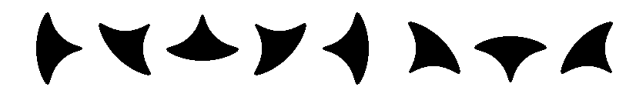

In [37]:
targ_arr = np.zeros((100,800)); 
for r in np.arange(8):  # number of rotations
    targ_shape = PSG.create_shape(15,r,shape_size=[100,100],bg_multiple=1.0); 
    targ_shape = targ_shape[:,:,0].squeeze().copy(); 
    targ_shape[targ_shape>80] = 255; 
    targ_shape[targ_shape<80] = 0; 
    targ_arr[:,r*100:(r+1)*100] = targ_shape; 

plt.figure(figsize=(8,1)); 
plt.imshow(targ_arr,cmap='binary'); 
plt.axis('off'); 

### Pre-processing #0: get shape selective units

In [38]:
grCe_fval, grCe_pval = func.ANOVA_shape_selectivity(crowd_units, crowd_trials, 'grCe')

### Pre-processing #1: Compute modulation index

In [39]:
if os.path.exists(file_dir+'mod_df.csv'):
    mod_df = pd.read_csv(file_dir + 'mod_df.csv')
else:
    mod_df = func.create_mod_df(crowd_units, crowd_trials, file_dir); 

### Pre-processing #2: Compute r_er
- square root of r2_er, unbiased r^2 between two sets of noisy neural responses

In [40]:
if os.path.exists(file_dir+'r_er_df.csv'):
    r_er_df = pd.read_csv(file_dir + 'r_er_df.csv')
else:
    r_er_df = func.create_r_er_df(crowd_units, crowd_trials, file_dir);     

In [57]:
r_er_df.loc[np.where(grCe_pval<0.05)[0],'grCe_grSu6Ne: r_er'].mean()

0.24333280938027466

### Pre-processing #3: Time course of shape-dependent modulation

- compute TC shape modulation

In [16]:
if os.path.exists(file_dir+'TC_shape_mod.npz'):
    TC_shape_mod = np.load(file_dir + 'TC_shape_mod.npz',allow_pickle=True); 
    pass; 
else:
    TC_shape_mod = func.compute_TC_shape_modulation(crowd_units, crowd_trials, file_dir); 

### Figure 2A-C. 
- Example Unit #1: Distance effect 

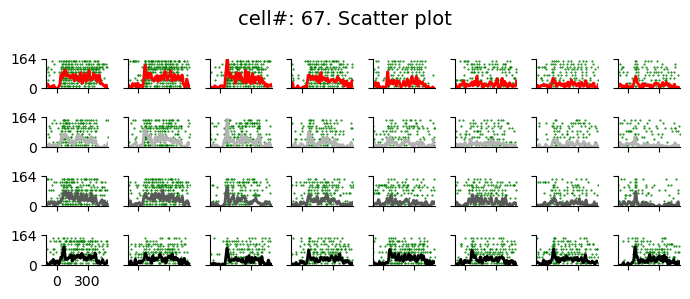

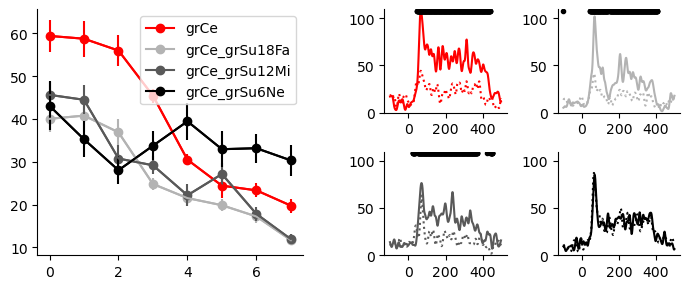

In [14]:
unitID = 67; 
conditions = ['grCe','grCe_grSu18Fa','grCe_grSu12Mi','grCe_grSu6Ne']; 
colors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; 

# Figure 2A
func.draw_raster(crowd_units, crowd_trials, unitID, conditions, colors)

# Figure 2B-C
func.draw_tuning_sigMod(crowd_units, crowd_trials, unitID, conditions, colors)



### Figure 3A-C 
- Example Unit #2: number effect

"\nunitID = 69; \nconditions = ['grCe','grCe_grSu12SmCiNe','grCe_grSu6CiNe','grCe_grSu6Ne']; \ncolors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; \n"

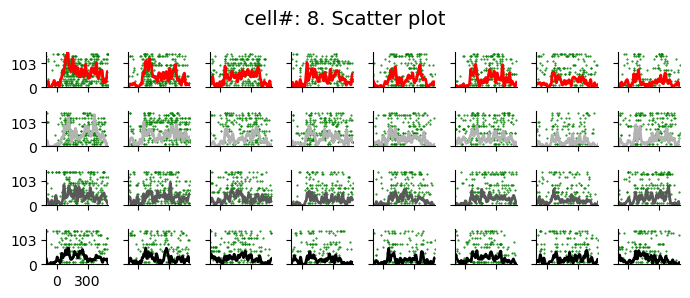

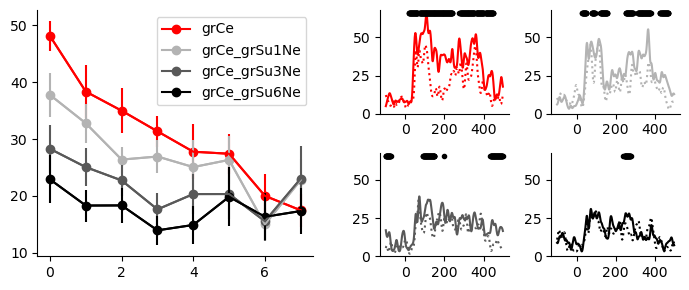

In [15]:
unitID = 8; 
conditions = ['grCe','grCe_grSu1Ne','grCe_grSu3Ne','grCe_grSu6Ne']; 
colors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; 

# Figure 3A
func.draw_raster(crowd_units, crowd_trials, unitID, conditions, colors)

# Figure 3B-C
func.draw_tuning_sigMod(crowd_units, crowd_trials, unitID, conditions, colors)

### Figure 5A-C

"\nunitID = 69; \nconditions = ['grCe','grCe_grSu12SmCiNe','grCe_grSu6CiNe','grCe_grSu6Ne']; \ncolors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; \n"

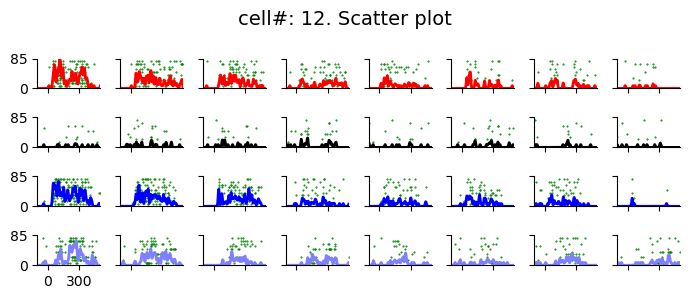

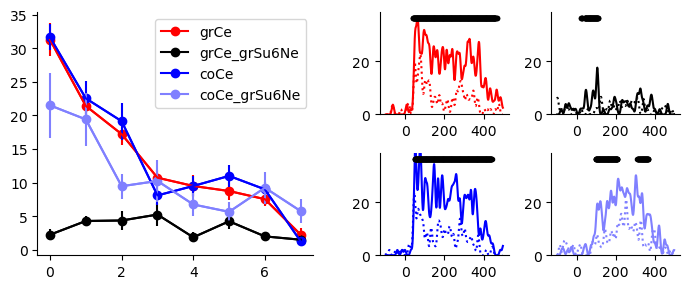

In [16]:
unitID = 12; 
conditions = ['grCe','grCe_grSu6Ne','coCe','coCe_grSu6Ne']; 
colors = [(1,0,0),(0,0,0),(0,0,1),(0.5,0.5,1)]; 

# Figure 5A
func.draw_raster(crowd_units, crowd_trials, unitID, conditions, colors)

# Figure 5B-C
func.draw_tuning_sigMod(crowd_units, crowd_trials, unitID, conditions, colors)

### Figure 6A-C

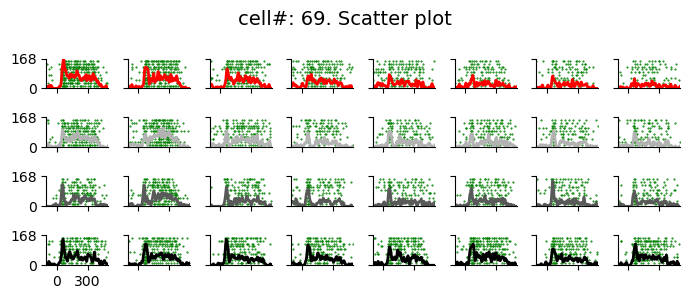

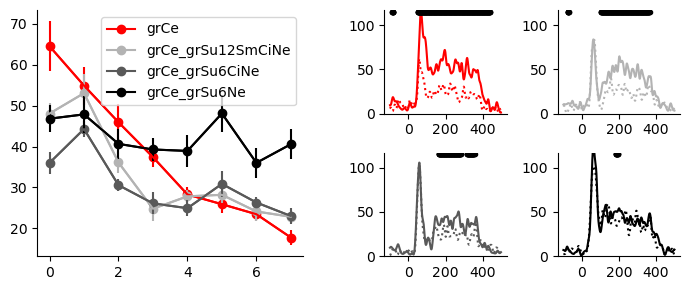

In [17]:
unitID = 69; 
conditions = ['grCe','grCe_grSu12SmCiNe','grCe_grSu6CiNe','grCe_grSu6Ne']; 
colors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; 

# Figure 6A
func.draw_raster(crowd_units, crowd_trials, unitID, conditions, colors)

# Figure 6B-C
func.draw_tuning_sigMod(crowd_units, crowd_trials, unitID, conditions, colors)

### Population tuning curves
- Distance
- Number
- Color
- Distractor shape

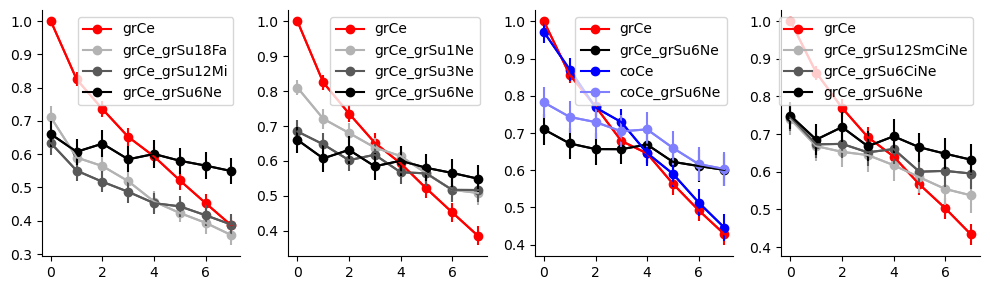

In [40]:
plt.figure(figsize=(10,3)); 

# Distance
plt.subplot(1,4,1)
conditions = ['grCe','grCe_grSu18Fa','grCe_grSu12Mi','grCe_grSu6Ne']; 
colors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; 
func.draw_pop_tuning(crowd_units, crowd_trials, grCe_pval, conditions, colors)

# Number
plt.subplot(1,4,2)
conditions = ['grCe','grCe_grSu1Ne','grCe_grSu3Ne','grCe_grSu6Ne']; 
colors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; 
func.draw_pop_tuning(crowd_units, crowd_trials, grCe_pval, conditions, colors)

# Color
plt.subplot(1,4,3)
conditions = ['grCe','grCe_grSu6Ne','coCe','coCe_grSu6Ne']; 
colors = [(1,0,0),(0,0,0),(0,0,1),(0.5,0.5,1)]; 
func.draw_pop_tuning(crowd_units, crowd_trials, grCe_pval, conditions, colors)

# Distractor shape
plt.subplot(1,4,4)
conditions = ['grCe','grCe_grSu12SmCiNe','grCe_grSu6CiNe','grCe_grSu6Ne']; 
colors = [(1,0,0),(0.7,0.7,0.7),(0.35,0.35,0.35),(0,0,0)]; 
func.draw_pop_tuning(crowd_units, crowd_trials, grCe_pval, conditions, colors)

plt.tight_layout(); 

### Modulation index histogram
- Distance
- Number
- Color
- Distractor shape

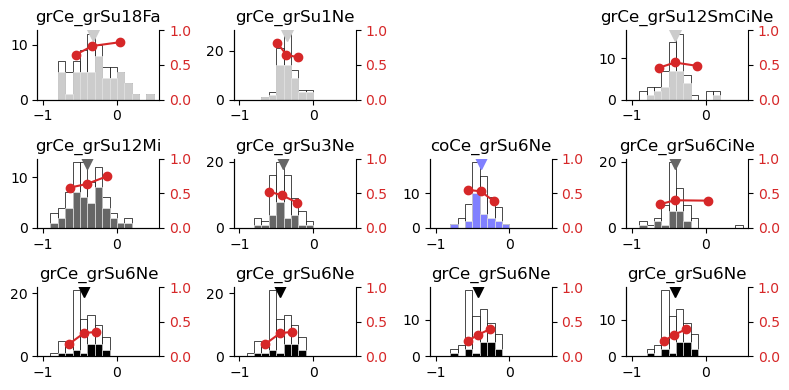

In [60]:
plt.figure(figsize=(8,4)); 
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu18Fa', color=[0.8,0.8,0.8], axis=1)
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu12Mi', color=[0.4,0.4,0.4], axis=5)
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu6Ne', color=[0,0,0], axis=9)

func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu1Ne', color=[0.8,0.8,0.8], axis=2)
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu3Ne', color=[0.4,0.4,0.4], axis=6)
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu6Ne', color=[0,0,0], axis=10)

func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'coCe_grSu6Ne', color=[0.5,0.5,1], axis=7)
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu6Ne', color=[0,0,0], axis=11, cond2='grCe_grSu12SmCiNe')

func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu12SmCiNe', color=[0.8,0.8,0.8], axis=4, cond2='grCe_grSu6CiNe')
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu6CiNe', color=[0.4,0.4,0.4], axis=8, cond2='grCe_grSu12SmCiNe')
func.draw_mod_histogram(mod_df, r_er_df, grCe_pval, 'grCe_grSu6Ne', color=[0,0,0], axis=12, cond2='grCe_grSu12SmCiNe')

plt.tight_layout(); 

### Time course of significant shaple-dependent modulation 
- Distance
- Number
- Color
- Distractor shape

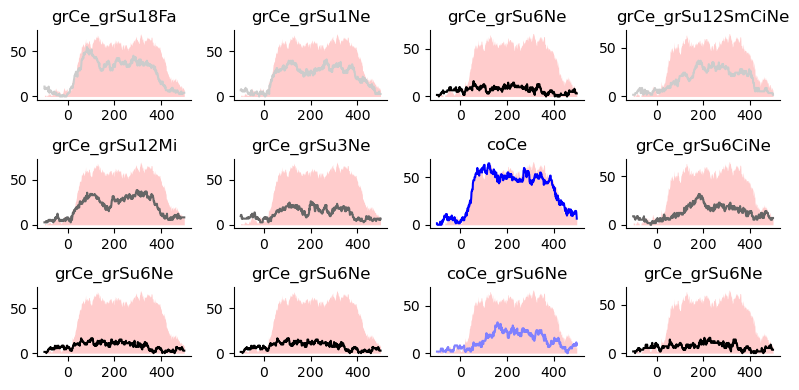

In [46]:
func.draw_TC_shape_modulation(TC_shape_mod, grCe_pval); 

In [13]:
rf_df

,sesName,sesID,RF_unitID,pNum_min,pNum_max,xRange,yRange,RFmap_norm,spon_norm,RFmap_spline,...,p_x0,p_y0,eccen,p_sigx,p_sigy,p_theta,aspect_ratio,p_offset,fit_r,pNum_match
id,,,,,,,,,,,,,,,,,,,,,
0,F190723,0,0,0.0,0.0,"[0, 6]","[-9, -3]","[0.4431867914612196, 0.5667887655144925, 0.582...",0.141975,"[0.1908128100029914, 0.22021222250140182, 0.24...",...,0.281866,-5.220721,5.228324,3.511085,2.237973,2.248750,1.568868,0.151123,0.966771,0.0
1,F190729,1,1,1.0,1.0,"[0, 6]","[-10, -4]","[0.06764185332224698, 0.14232350975525715, 0.1...",0.090909,"[0.04280754185070994, 0.05040940279522375, 0.0...",...,4.298596,-6.655414,7.922907,2.104044,1.775943,3.022437,1.184748,0.104235,0.957922,1.0
2,F190730,2,2,2.0,2.0,"[0, 6]","[-10, -4]","[0.2457060185272067, 0.17085602911052863, 0.18...",0.335766,"[0.0737081788742473, 0.08385275974969146, 0.09...",...,3.138503,-6.640118,7.344479,1.109977,1.032757,2.671288,1.074771,0.232567,0.977099,2.0
3,F190731,3,3,3.0,3.0,"[0, 6]","[-10, -4]","[0.19890566748085672, 0.3109033745454019, 0.24...",0.379310,"[0.09742612768940054, 0.1125395496473003, 0.12...",...,2.851609,-5.259112,5.982469,2.556963,1.213236,2.701059,2.107556,0.286507,0.937089,3.0
4,F190802,4,4,4.0,4.0,"[1, 7]","[-10, -4]","[0.484093997433454, 0.4399128976548501, 0.9825...",0.400000,"[0.10464485188779739, 0.1217151320889991, 0.13...",...,5.245567,-9.455852,10.813377,5.000000,2.549539,1.924283,1.961139,0.227958,0.646079,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,J210713,125,155,143.0,144.0,"[4, 10]","[-3, 3]","[0.2991277582334909, 0.34883666187021867, 0.37...",0.339286,"[0.10820707869835004, 0.12449496179287652, 0.1...",...,6.155338,1.483140,6.331500,2.534400,1.472671,1.671822,1.720955,0.287637,0.932679,143.0
156,J210713,126,156,143.0,144.0,"[1, 7]","[-9, -3]","[0.004129402083669879, 0.042954028844736564, 0...",0.086614,"[0.010271684401742224, 0.012936189419000248, 0...",...,3.268062,-5.063950,6.026924,1.873692,1.251926,2.303596,1.496648,0.058844,0.975839,144.0
157,J210713,126,157,143.0,144.0,"[1, 7]","[-9, -3]","[0.1460280705055217, 0.5697704977363793, 0.313...",0.000000,"[0.12408500043584247, 0.1466546644984671, 0.16...",...,2.769347,-7.067040,7.590279,1.462082,1.095888,1.570796,1.334153,0.094630,0.903525,NaN


In [30]:
rf_data = dict(); 
rf_data['sesName'] = rf_df['sesName'].values
rf_data['sesID'] = rf_df['sesID'].values
rf_data['RF_unitID'] = rf_df['RF_unitID'].values
rf_data['xRange'] = rf_df['xRange'].values
rf_data['yRange'] = rf_df['yRange'].values
rf_data['RFmap_norm'] = rf_df['RFmap_norm'].values
rf_data['spon_norm'] = rf_df['spon_norm'].values
rf_data['RFmap_spline'] = rf_df['RFmap_spline'].values
rf_data['maxPos'] = rf_df['maxPos'].values
rf_data['p_amp'] = rf_df['p_amp'].values
rf_data['p_x0'] = rf_df['p_x0'].values
rf_data['p_y0'] = rf_df['p_y0'].values
rf_data['eccen'] = rf_df['eccen'].values
rf_data['p_sigx'] = rf_df['p_sigx'].values
rf_data['p_sigy'] = rf_df['p_sigy'].values
rf_data['p_theta'] = rf_df['p_theta'].values
rf_data['aspect_ratio'] = rf_df['aspect_ratio'].values
rf_data['p_offset'] = rf_df['p_offset'].values
rf_data['fit_r'] = rf_df['fit_r'].values
rf_data['pNum_match'] = rf_df['pNum_match'].values

np.savez(file_dir+'rf_data.npz', **rf_data); 


In [31]:
rf_data = np.load(file_dir+'rf_data.npz', allow_pickle=True); 

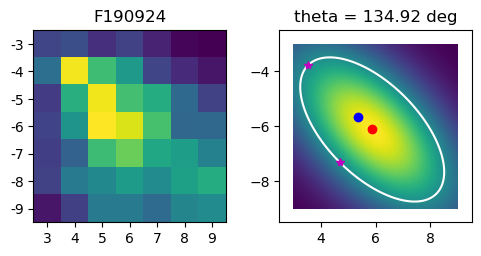

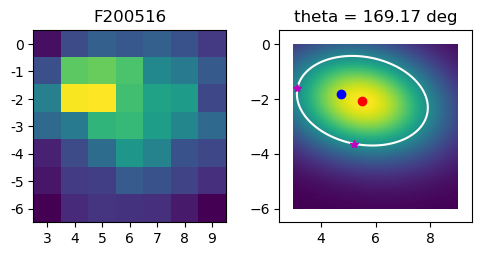

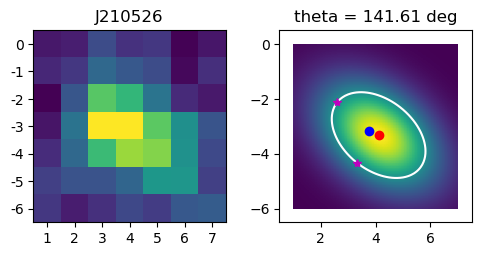

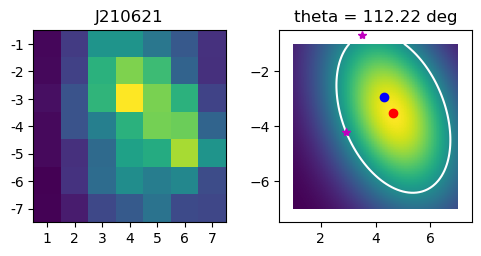

In [32]:
from importlib import reload; 
reload(func); 
func.draw_RFmap(rf_data,20); 
func.draw_RFmap(rf_data,39); 
func.draw_RFmap(rf_data,98);  
func.draw_RFmap(rf_data,133); 